In [ ]:
# This script generates a sample "Monsoon Mandala" artwork using placeholder data. 
# Replace the synthetic data block with your real pandas DataFrame columns to recreate the piece with your tea farm data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import get_kit_measurements_df

weatherdata_df = get_kit_measurements_df(1001)

In [ ]:
weatherdata_df

In [ ]:
weatherdata_df_copy = weatherdata_df.copy()
weatherdata_df_copy.drop(columns=['kit_id', "unit","_raw"]).dropna().pivot(index="timestamp", columns='sensor', values='value')

In [ ]:
weatherdata_df.drop(columns=['kit_id', "unit","_raw"], inplace=True)
weatherdata_df.dropna(inplace=True)
weatherdata_df.index = pd.to_datetime(weatherdata_df.index)
weatherdata_df = weatherdata_df.pivot(index="timestamp", columns='sensor', values='value')
weatherdata_df.columns

In [ ]:
weatherdata_df.head(20)

('output/monsoon_mandala_example.png', 'output/monsoon_mandala_example.svg')

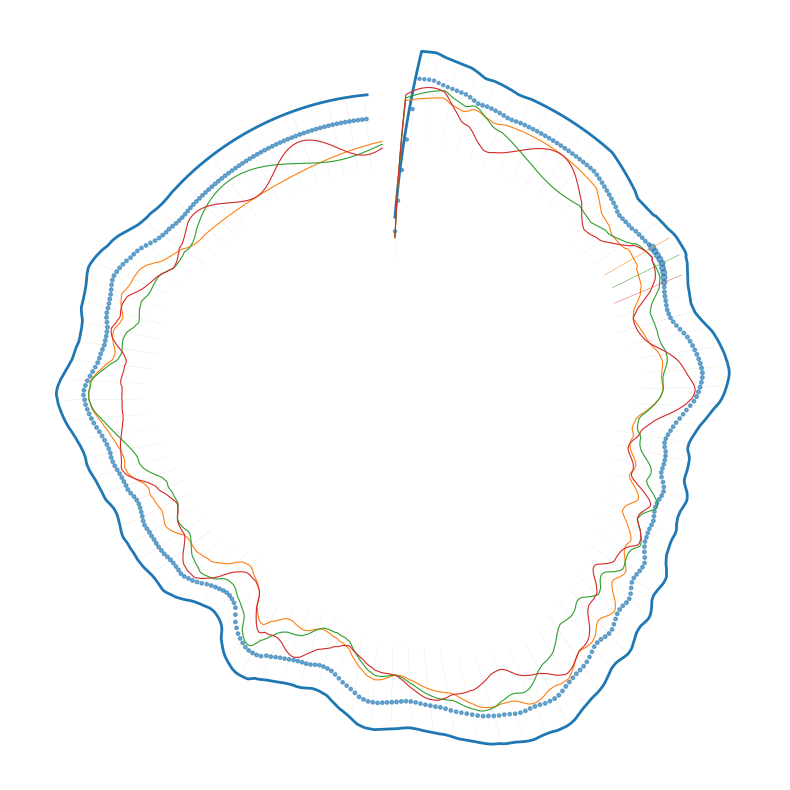

In [25]:
# ---- Mapping to polar "Monsoon Mandala" ----
# Angles map to time; radii encode a blended metric; thickness & dot size encode other variables.

df = weatherdata_df
theta = np.linspace(0, 2*np.pi, len(df), endpoint=False)

# Normalize helpers (avoid specifying colors, per instructions).
def norm(x):
    x = np.asarray(x)
    if np.nanmax(x) - np.nanmin(x) == 0:
        return np.zeros_like(x)
    return (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))

T = norm(df['ftTemp'].values)
H = norm(df['gbHum'].values)
R = norm(df['NH3'].values)
W = norm(df['C3H8'].values)
L = norm(df['CO'].values)

# Radius combines temp (outer breathing), humidity (inner swell), light (diurnal bloom)
radius = 0.45 + 0.35*(0.5*T + 0.3*H + 0.2*L)

# Stroke width from wind; point size from rainfall intensity
stroke = 0.3 + 3.2*W
dots = 5 + 60*R

# Rolling medians for smooth rings
def smooth(x, k=21):
    if k < 3: 
        return x
    w = np.ones(k)/k
    return np.convolve(x, w, mode="same")

radius_smooth = smooth(radius, k=31)

# ---- Plot (no explicit colors; uses matplotlib defaults) ----
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection="polar")
ax.set_theta_direction(-1)         # clockwise
ax.set_theta_offset(np.pi/2.0)     # start at top
ax.set_axis_off()

# Outer ribbon
ax.plot(theta, radius_smooth, linewidth=2.0)

# Inner filigree rings
for k in [3, 7, 13]:
    ax.plot(theta, smooth(radius * (0.85 + 0.05*np.sin(k*theta)), k=15), linewidth=0.8)

# Rainfall pearls
ax.scatter(theta[::3], (radius_smooth*0.92)[::3], s=dots[::3], alpha=0.6)

# Wind tick marks (radial sticks)
for th, rr, sw in zip(theta[::12], radius_smooth[::12], stroke[::12]):
    ax.plot([th, th], [rr*0.75, rr*0.98], linewidth=sw*0.12, alpha=0.8)

plt.tight_layout()
png_path = "output/monsoon_mandala_example.png"
svg_path = "output/monsoon_mandala_example.svg"
plt.savefig(png_path, dpi=300, bbox_inches="tight", pad_inches=0.05)
plt.savefig(svg_path, bbox_inches="tight", pad_inches=0.05)
png_path, svg_path
